<a href="https://colab.research.google.com/github/hasmijalla/neuralnets/blob/main/Cali_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,r2_score
%matplotlib inline



In [ ]:
url = 'https://raw.githubusercontent.com/nanduOO5/California-House-Pricing/main/housing.csv'
cali = pd.read_csv(url)

In [ ]:
cali.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
df = pd.DataFrame(cali)

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

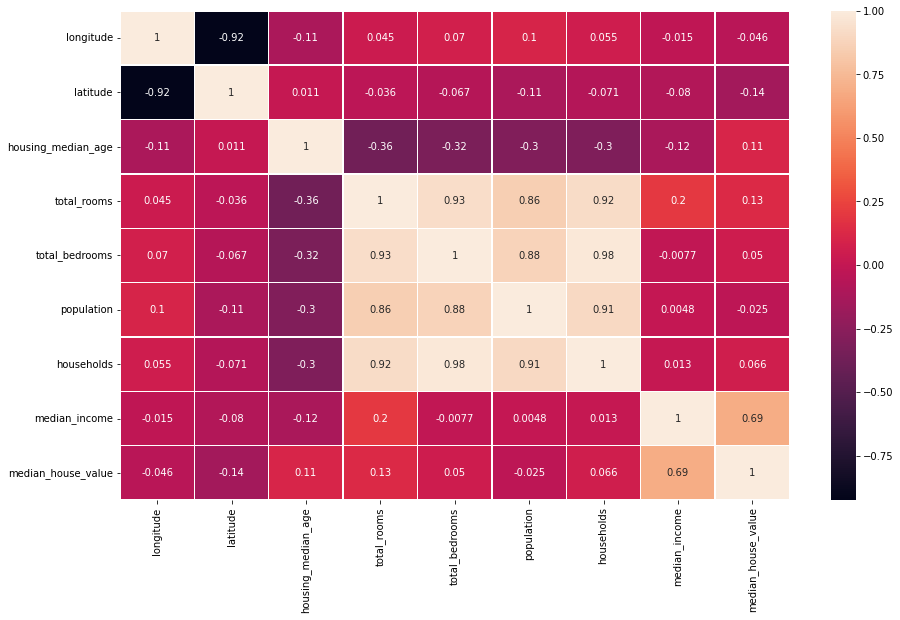

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(data = df.corr(), annot = True, linewidths = .5)

In [ ]:
bedroom_median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(bedroom_median, inplace = True)

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

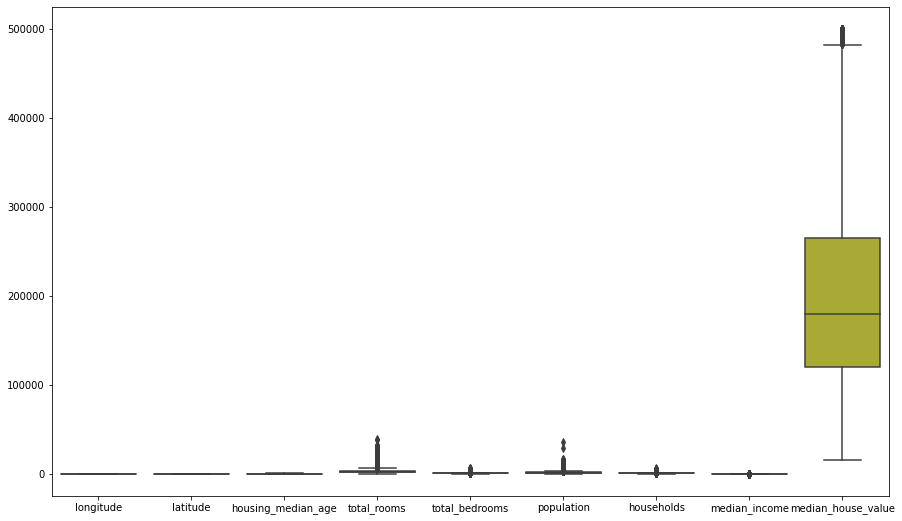

In [ ]:
plt.figure(figsize = (15,9))
sns.boxplot(data = df)

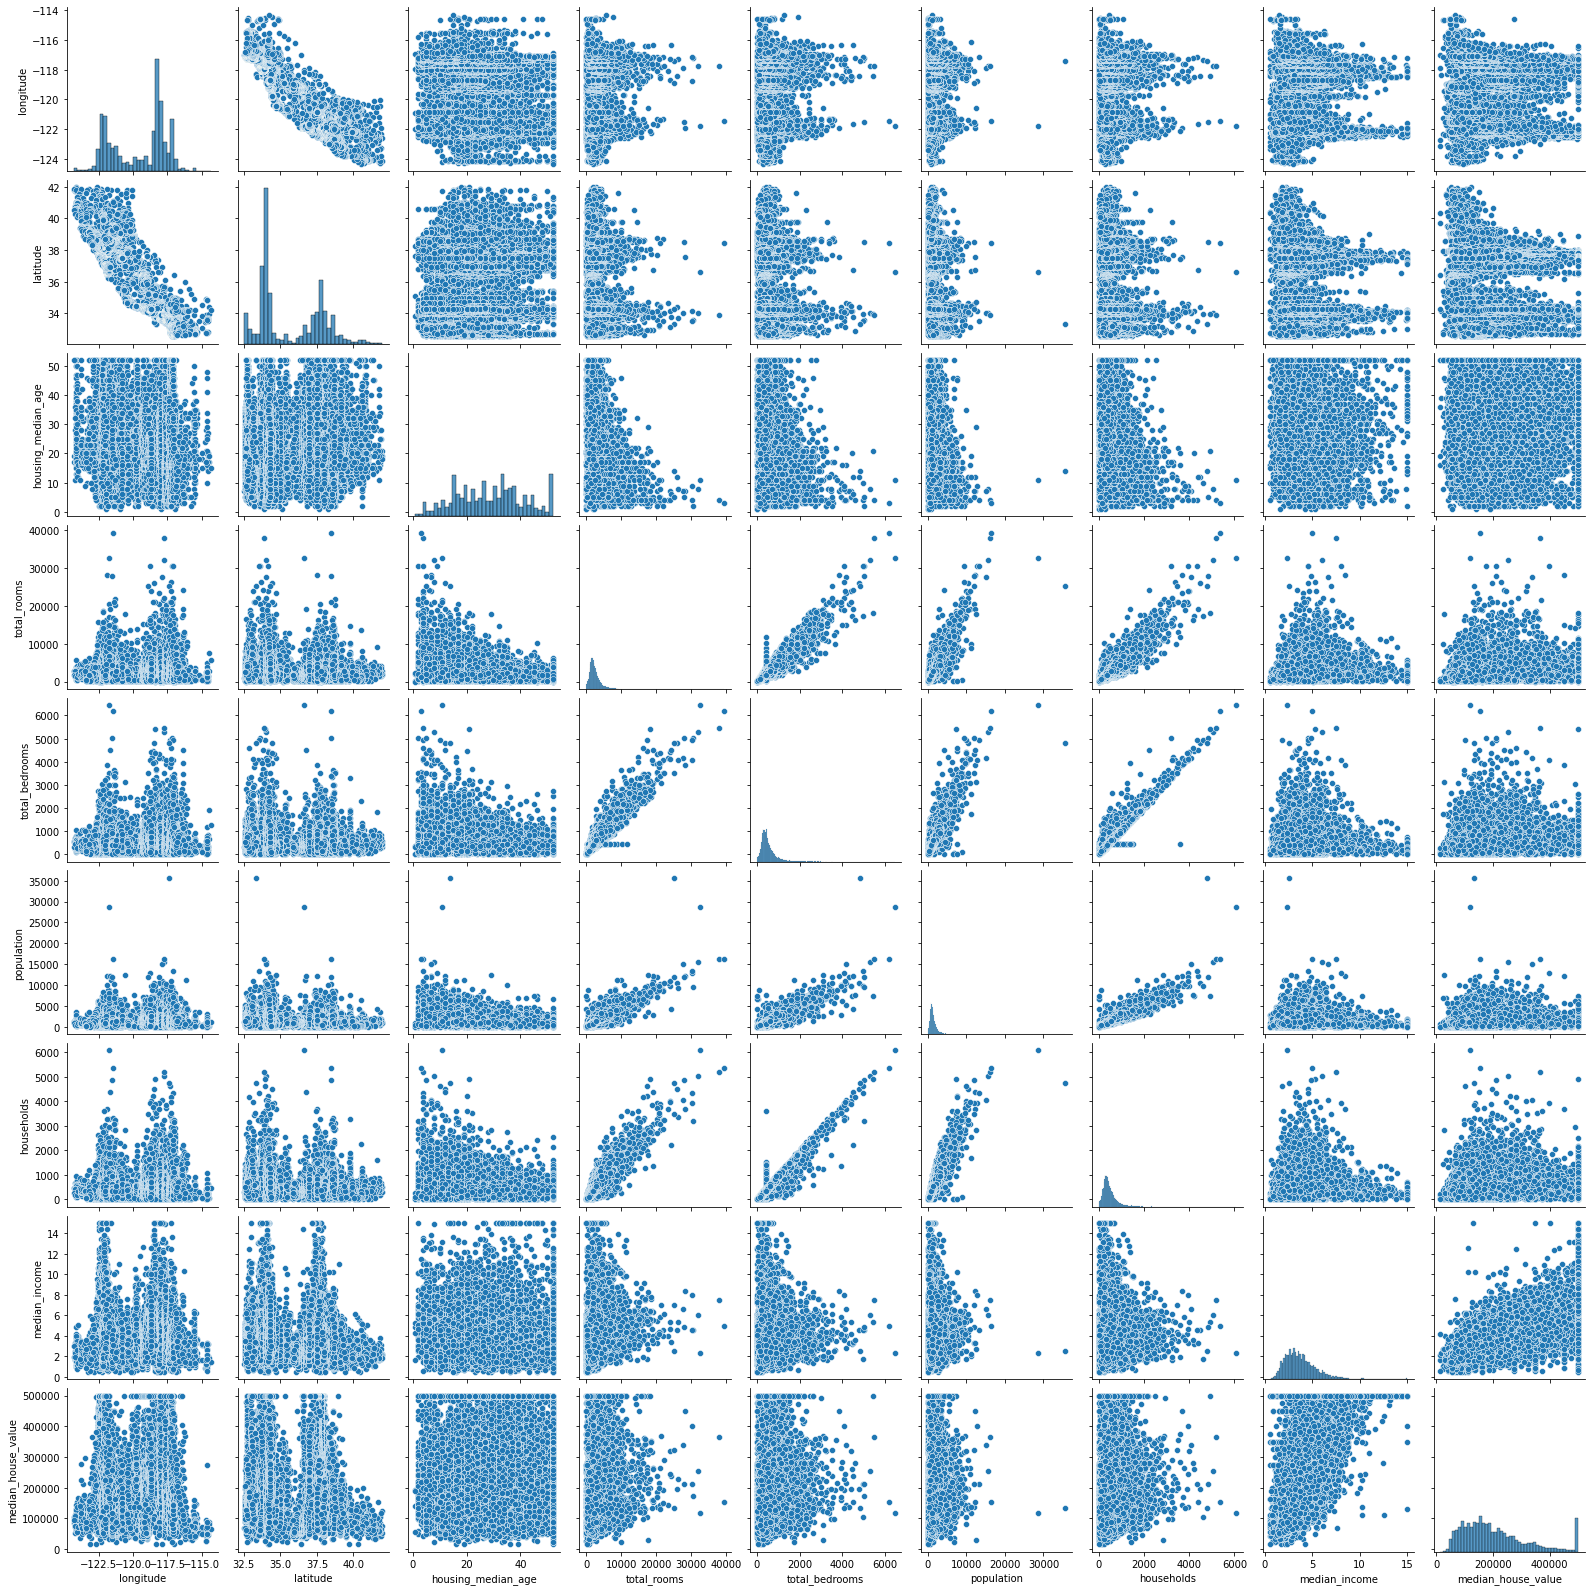

In [ ]:
sns.pairplot(data= df)

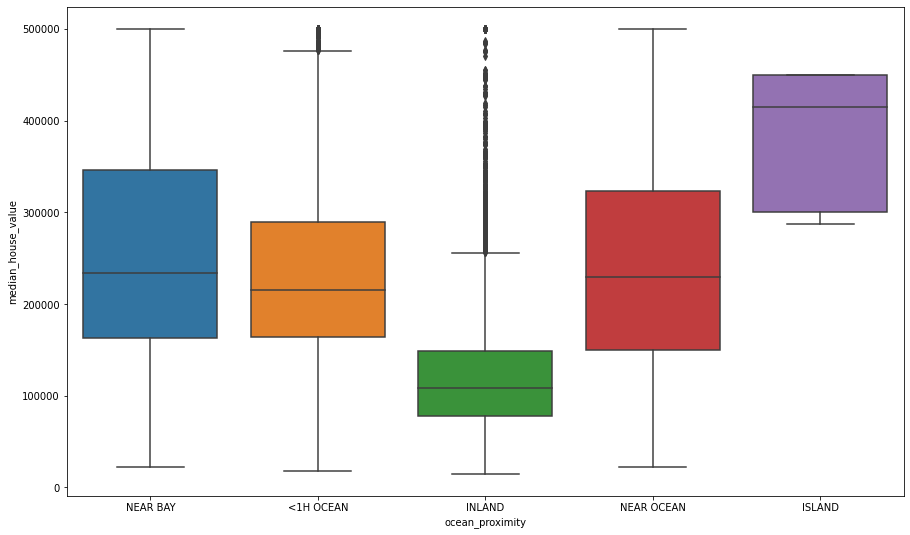

In [ ]:
plt.figure(figsize = (15,9))
sns.boxplot(data = df, x=df['ocean_proximity'], y= df['median_house_value'])

Observed outliers in the following features:
 Ocean proximity,
 total_bedrooms,
 total_rooms,
 population,
 households,
 median_income.
 We also observed outliers in Target value: median_house_value

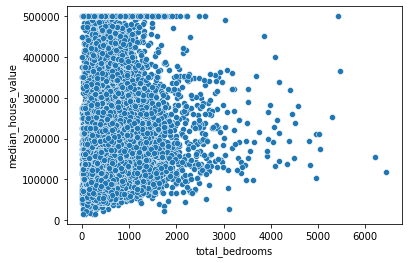

In [ ]:
sns.scatterplot(x=df['total_bedrooms'],y=df['median_house_value'])

In [ ]:
df[df['total_bedrooms']>=2800].shape

(90, 10)

In [ ]:
df=df[df['total_bedrooms']<2800]

In [ ]:
df.shape

(20550, 10)

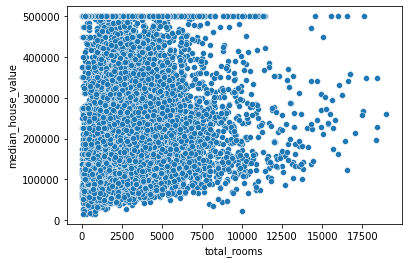

In [ ]:
sns.scatterplot(x=df['total_rooms'],y=df['median_house_value'])

In [ ]:
df=df[df['total_rooms']<15000]

In [ ]:
df.shape

(20519, 10)

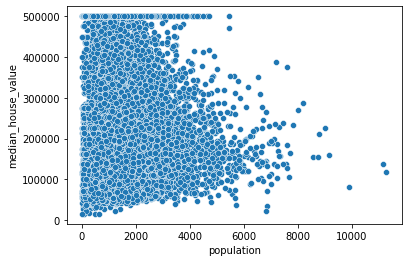

In [ ]:
sns.scatterplot(x=df['population'],y=df['median_house_value'])

In [ ]:
df=df[df['population']<6500]

In [ ]:
df.shape

(20460, 10)

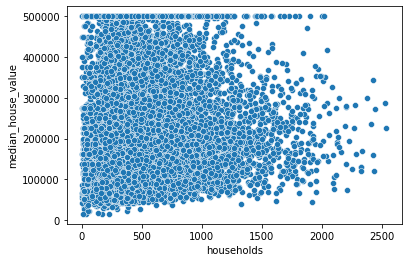

In [ ]:
sns.scatterplot(x=df['households'],y=df['median_house_value'])

In [ ]:
df=df[df['households']<2000]

In [ ]:
df.shape

(20411, 10)

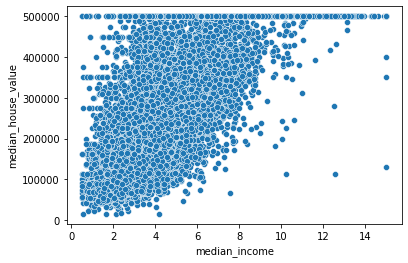

In [ ]:
sns.scatterplot(x=df['median_income'],y=df['median_house_value'])

In [ ]:
df=df[df['median_income']<9]
df.shape

(20006, 10)

In [ ]:
#CHECK BEFORE RUNNING
df=df[df['median_house_value']<500001]
df.shape

(19377, 10)

In [ ]:
ocean_le = LabelEncoder()
df['ocean_proximity'] = ocean_le.fit_transform(df['ocean_proximity'])

In [ ]:
df=df.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19377 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19377 non-null  float64
 1   latitude            19377 non-null  float64
 2   housing_median_age  19377 non-null  float64
 3   total_rooms         19377 non-null  float64
 4   total_bedrooms      19377 non-null  float64
 5   population          19377 non-null  float64
 6   households          19377 non-null  float64
 7   median_income       19377 non-null  float64
 8   median_house_value  19377 non-null  float64
 9   ocean_proximity     19377 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [ ]:
df_trim = df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households','median_income', 'ocean_proximity','median_house_value']]
df_trim.describe()

housing_median_age   total_rooms  total_bedrooms    population  \
count        19377.000000  19377.000000    19377.000000  19377.000000   
mean            28.590907   2483.887237      513.185890   1372.577437   
std             12.412913   1660.194781      330.223641    877.973358   
min              1.000000      2.000000        2.000000      3.000000   
25%             18.000000   1434.000000      298.000000    793.000000   
50%             29.000000   2095.000000      435.000000   1171.000000   
75%             37.000000   3073.000000      636.000000   1718.000000   
max             52.000000  14684.000000     2634.000000   6437.000000   

         households  median_income  ocean_proximity  median_house_value  
count  19377.000000   19377.000000     19377.000000        19377.000000  
mean     478.070496       3.642905         1.152655       191452.278268  
std      301.360564       1.510987         1.402201        96982.532318  
min        2.000000       0.499900         0.000000        14999.000000  
25%      281.000000       2.519700         0.000000       116000.000000  
50%      408.000000       3.429700         1.000000       173100.000000  
75%      597.000000       4.557700         1.000000       247100.000000  
max     1997.000000       8.966900         4.000000       500000.000000

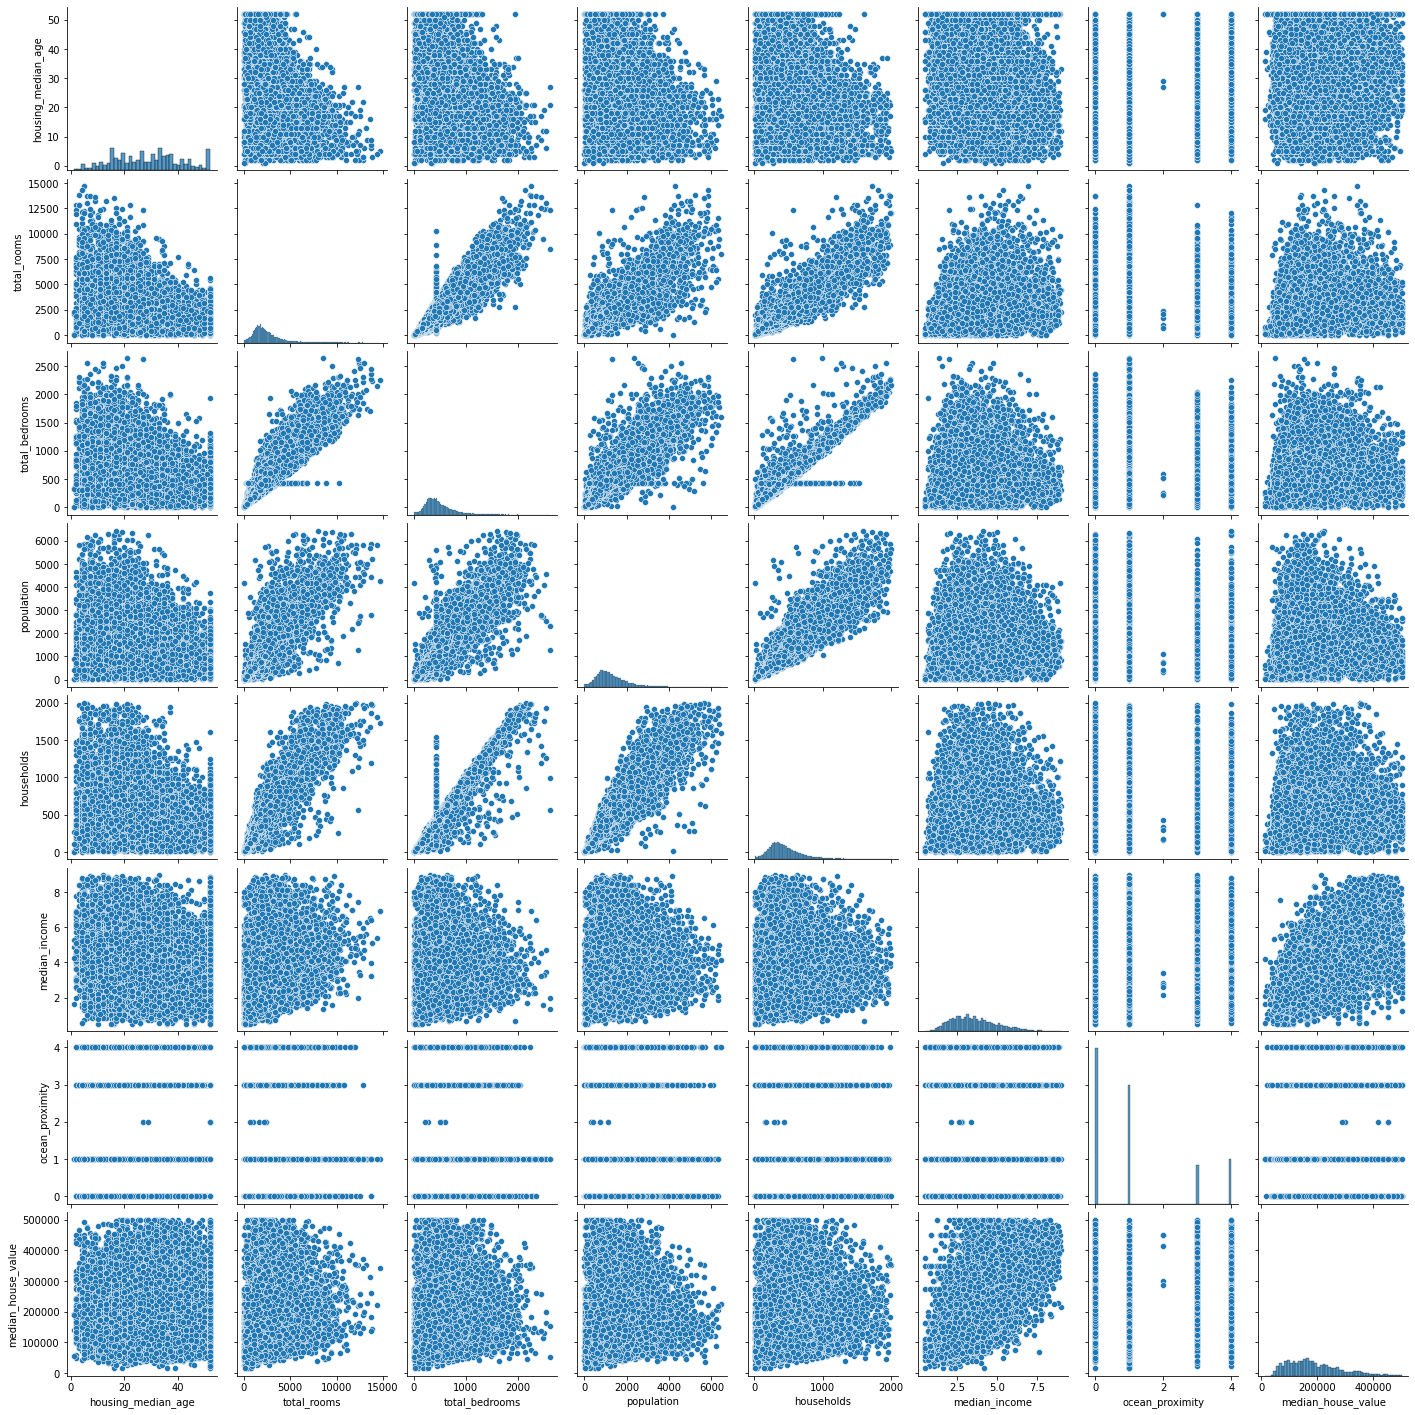

In [ ]:
sns.pairplot(df_trim)

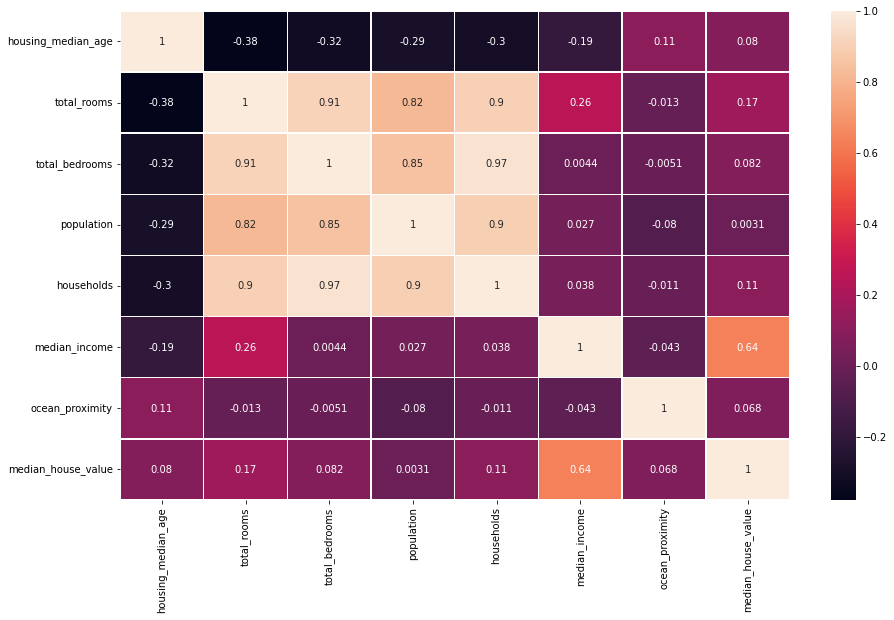

In [ ]:
corr_matrix = df_trim.corr()
plt.figure(figsize = (15,9))
sns.heatmap(data = corr_matrix, annot = True, linewidths= .5)

In [ ]:
X = df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households','median_income', 'ocean_proximity']]
Y = df[["median_house_value"]]

In [ ]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [ ]:
X_train.shape

(15501, 7)

In [ ]:
X_test.shape

(3876, 7)

In [ ]:
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

In [ ]:
lr = LinearRegression()

In [ ]:
sgr = SGDRegressor(alpha = 0.001, learning_rate='invscaling', eta0 = 0.0001, max_iter=5000)

In [ ]:
lr.fit(X_train, Y_train)
LinearRegression()

LinearRegression()

In [ ]:
lr.coef_

array([[ 31352.99712106, -48206.85739681,  37565.43177736,
        -34640.75942175,  54035.70548067, 104808.24349893,
          3618.03806547]])

In [ ]:
lr.intercept_

array([179621.26652981])

In [ ]:
sgr.fit(X_train, Y_train.values.ravel())

SGDRegressor(alpha=0.001, eta0=0.0001, max_iter=5000)

In [ ]:
sgr.coef_

array([ 31342.2464995 , -46870.79962676,  37215.77450528, -34149.72746991,
        52602.55178534, 104193.71468491,   3628.97899423])

In [ ]:
sgr.intercept_

array([179660.85520731])

In [ ]:
# model evaluation for training set
y_train_predict = lr.predict(X_train)
rmse_lr_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2_lr_train = r2_score(Y_train, y_train_predict)
mae_lr_train = mean_absolute_error(Y_train,y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_lr_train))
print('R2 score is {}'.format(r2_lr_train))
print('MAE score is {}'.format(mae_lr_train))
print("\n")

# model evaluation for testing set
y_test_predict = lr.predict(X_test)
rmse_lr_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_lr_test = r2_score(Y_test, y_test_predict)
mae_lr_test = mean_absolute_error(Y_test,y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_lr_test))
print('R2 score is {}'.format(r2_lr_test))
print('MAE score is {}'.format(mae_lr_test))

The model performance for training set
--------------------------------------
RMSE is 66311.0848719322
R2 score is 0.5357623478311717
MAE score is 49940.85976394912


The model performance for testing set
--------------------------------------
RMSE is 65656.28183161258
R2 score is 0.5280360393058079
MAE score is 49992.79980277189


In [ ]:
# model evaluation for training set
y_train_predict = sgr.predict(X_train)
rmse_sgr_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2_sgr_train = r2_score(Y_train, y_train_predict)
mae_sgr_train = mean_absolute_error(Y_train,y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_sgr_train))
print('R2 score is {}'.format(r2_sgr_train))
print('MAE score is {}'.format(mae_sgr_train))
print("\n")

# model evaluation for testing set
y_test_predict = sgr.predict(X_test)
rmse_sgr_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_sgr_test = r2_score(Y_test, y_test_predict)
mae_sgr_test = mean_absolute_error(Y_test,y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_sgr_test))
print('R2 score is {}'.format(r2_sgr_test))
print('MAE score is {}'.format(mae_sgr_test))

The model performance for training set
--------------------------------------
RMSE is 66313.45931132649
R2 score is 0.5357291007833462
MAE score is 49955.69665293142


The model performance for testing set
--------------------------------------
RMSE is 65653.992936859
R2 score is 0.528068945738314
MAE score is 50001.01996885544


In [ ]:
rows_train = ["r2_score" ,"RMSE", "MAE"]
data_train = [[r2_lr_train, r2_sgr_train], [rmse_lr_train, rmse_sgr_train], [mae_lr_train, mae_sgr_train]]
cols_train = ['Linear Regression' , 'SGD']
pd.DataFrame(data=data_train , index= rows_train , columns= cols_train)

Linear Regression           SGD
r2_score           0.535762      0.535729
RMSE           66311.084872  66313.459311
MAE            49940.859764  49955.696653

In [ ]:
rows = ["r2_score" ,"RMSE", "MAE"]
data = [[r2_lr_test, r2_sgr_test], [rmse_lr_test, rmse_sgr_test], [mae_lr_test, mae_sgr_test]]
cols = ['Linear Regression' , 'SGD']
pd.DataFrame(data=data , index= rows , columns= cols)

Linear Regression           SGD
r2_score           0.528036      0.528069
RMSE           65656.281832  65653.992937
MAE            49992.799803  50001.019969

**Log : including latitude and longitude features for better precision**

In [ ]:
df_trim = df[['latitude','longitude','housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households','median_income', 'ocean_proximity','median_house_value']]

In [ ]:
X = df[['latitude','longitude','housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households','median_income', 'ocean_proximity']]
Y = df[["median_house_value"]]
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)
lr = LinearRegression()
sgr = SGDRegressor(alpha = 0.001, learning_rate='invscaling', eta0 = 0.0001, max_iter=5000)
lr.fit(X_train, Y_train)
LinearRegression()
sgr.fit(X_train, Y_train.values.ravel())


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDRegressor(alpha=0.001, eta0=0.0001, max_iter=5000)

In [ ]:
# model evaluation for training set (including latitude and longitude)
y_train_predict = lr.predict(X_train)
rmse_lr_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2_lr_train = r2_score(Y_train, y_train_predict)
mae_lr_train = mean_absolute_error(Y_train,y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_lr_train))
print('R2 score is {}'.format(r2_lr_train))
print('MAE score is {}'.format(mae_lr_train))
print("\n")

# model evaluation for testing set (including latitude and longitude)
y_test_predict = lr.predict(X_test)
rmse_lr_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_lr_test = r2_score(Y_test, y_test_predict)
mae_lr_test = mean_absolute_error(Y_test,y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_lr_test))
print('R2 score is {}'.format(r2_lr_test))
print('MAE score is {}'.format(mae_lr_test))

The model performance for training set
--------------------------------------
RMSE is 60727.54795354266
R2 score is 0.610650531631616
MAE score is 45286.95169408286


The model performance for testing set
--------------------------------------
RMSE is 60624.74258217955
R2 score is 0.5976017504154549
MAE score is 46139.24090195763


In [ ]:
# model evaluation for training set (including latitude and longitude)
y_train_predict = sgr.predict(X_train)
rmse_sgr_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2_sgr_train = r2_score(Y_train, y_train_predict)
mae_sgr_train = mean_absolute_error(Y_train,y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_sgr_train))
print('R2 score is {}'.format(r2_sgr_train))
print('MAE score is {}'.format(mae_sgr_train))
print("\n")

# model evaluation for testing set (including latitude and longitude)
y_test_predict = sgr.predict(X_test)
rmse_sgr_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_sgr_test = r2_score(Y_test, y_test_predict)
mae_sgr_test = mean_absolute_error(Y_test,y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_sgr_test))
print('R2 score is {}'.format(r2_sgr_test))
print('MAE score is {}'.format(mae_sgr_test))

The model performance for training set
--------------------------------------
RMSE is 60939.83291312953
R2 score is 0.6079236801833766
MAE score is 45383.76841213765


The model performance for testing set
--------------------------------------
RMSE is 60756.00214179241
R2 score is 0.5958573868445407
MAE score is 46148.063133343574


In [ ]:
rows_train = ["r2_score" ,"RMSE", "MAE"]
data_train = [[r2_lr_train, r2_sgr_train], [rmse_lr_train, rmse_sgr_train], [mae_lr_train, mae_sgr_train]]
cols_train = ['Linear Regression' , 'SGD']
pd.DataFrame(data=data_train , index= rows_train , columns= cols_train)

Linear Regression           SGD
r2_score           0.610651      0.607924
RMSE           60727.547954  60939.832913
MAE            45286.951694  45383.768412

In [ ]:
rows = ["r2_score" ,"RMSE", "MAE"]
data = [[r2_lr_test, r2_sgr_test], [rmse_lr_test, rmse_sgr_test], [mae_lr_test, mae_sgr_test]]
cols = ['Linear Regression' , 'SGD']
pd.DataFrame(data=data , index= rows , columns= cols)

Linear Regression           SGD
r2_score           0.597602      0.595857
RMSE           60624.742582  60756.002142
MAE            46139.240902  46148.063133